### Heart desesase prediction using Machine learning

In [1]:
# Library import
import pandas as pd
import numpy as np

# importing for plot & graph
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset into DataFrame
df = pd.read_csv('Healthcare.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info


<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [4]:
df.shape

(303, 14)

In [5]:
#Print duplicate rows
duplicate = df.duplicated().sort_values()

duplicate

0      False
205    False
204    False
203    False
202    False
       ...  
97     False
96     False
102    False
302    False
164     True
Length: 303, dtype: bool

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().any()

False

#### To find initial statistical summary of the data and explore the measures of central tendencies and spread of the data

In [8]:
df.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### To explore the Categorical features in the data set

In [32]:
categorical = df.loc[:, (df < 10).any()].columns.to_list()
categorical

['sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

#### To find the uniqueness in categorical features

In [33]:
df[categorical].nunique()

sex         2
cp          4
fbs         2
restecg     3
exang       2
oldpeak    40
slope       3
ca          5
thal        4
target      2
dtype: int64

In [34]:
# We can REMOVE the oldpeak feature as there are 40 unique entries
categorical.remove('oldpeak')

#### Data Visualization

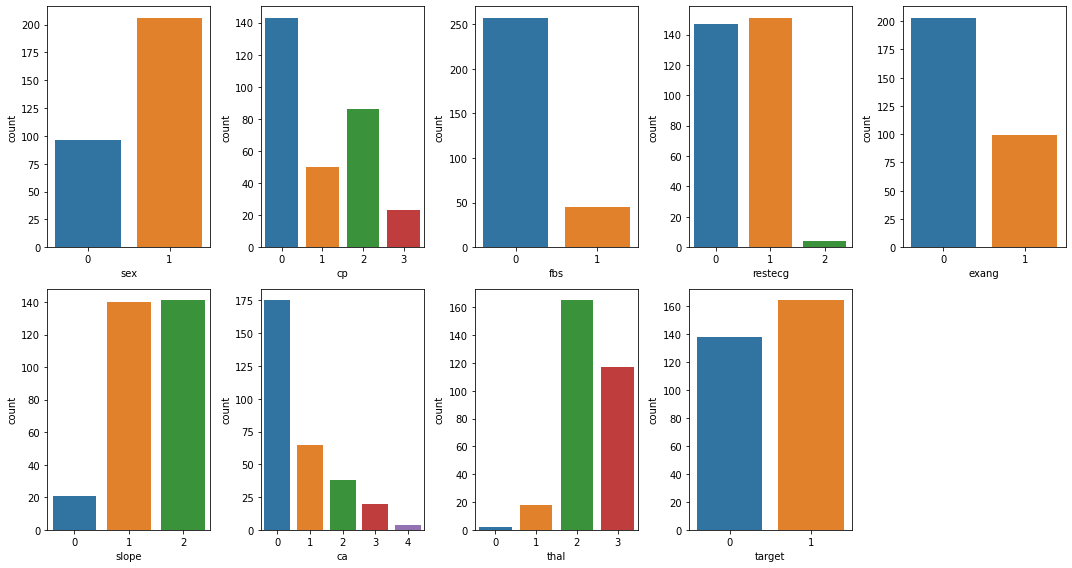

In [35]:
# Binary value 1 : Male & 0: Female
plt.figure(figsize=(15,8))
for i, var in enumerate(categorical):
    plt.subplot(2,5,i+1)
    sns.countplot(df[var])
    plt.tight_layout()

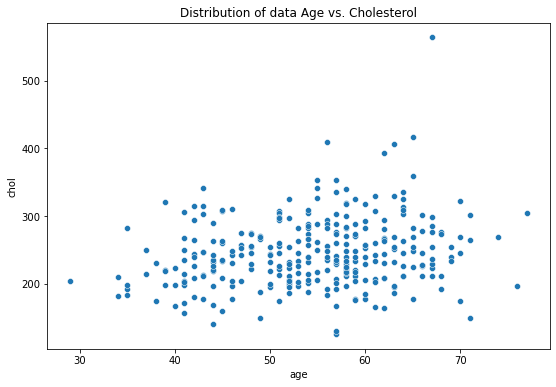

In [36]:
# Scatterplot : Age vs. Cholesterol lavel
plt.figure(figsize = (9,6))
sns.scatterplot(x =df['age'], y = df['chol'])
plt.title('Distribution of data Age vs. Cholesterol', size = 12)

plt.show()

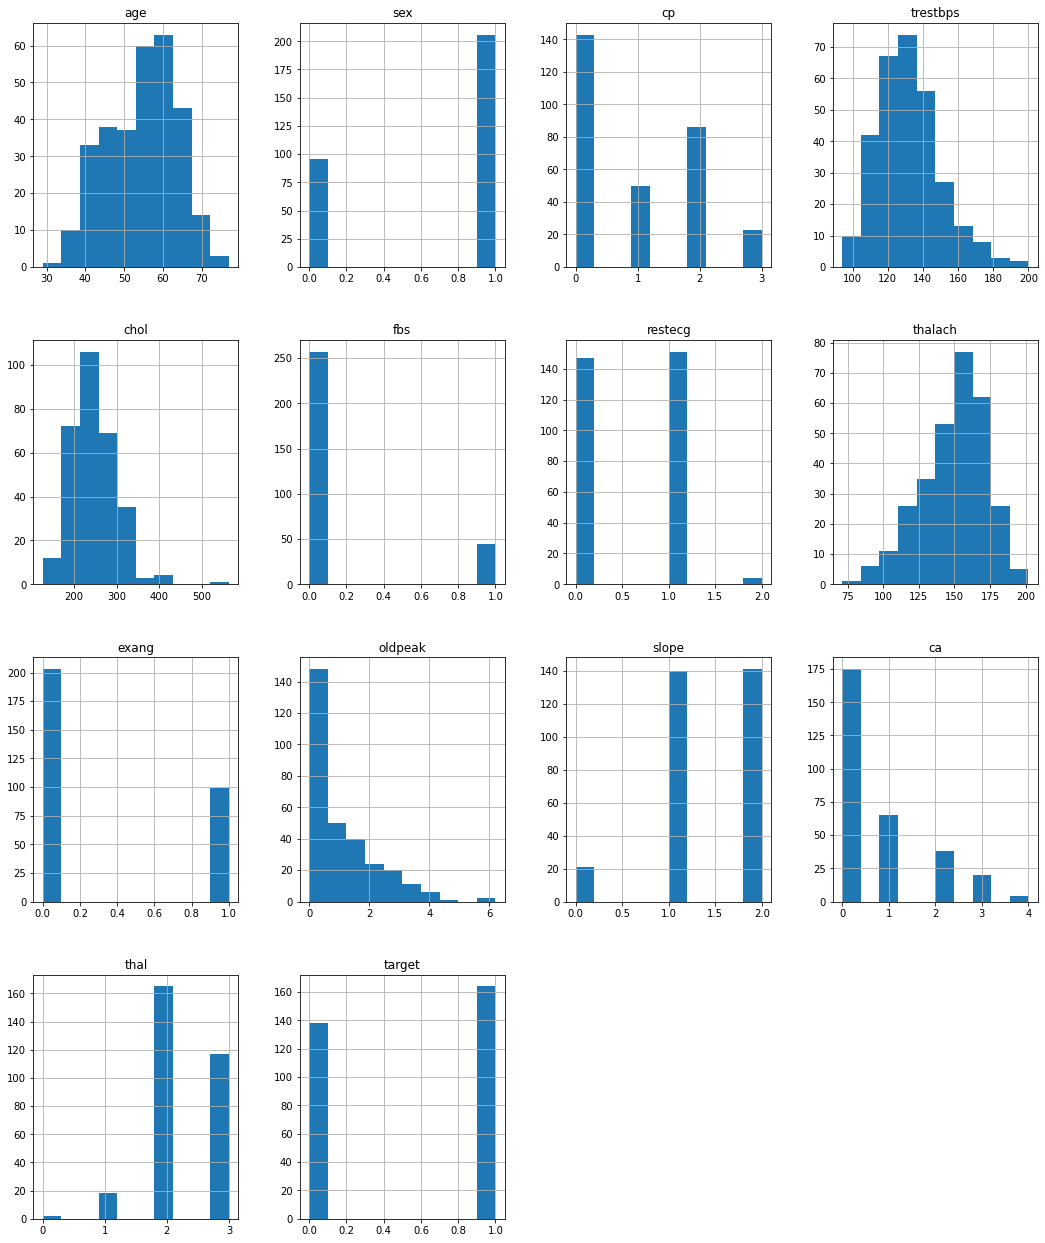

In [37]:
# Histogram 
fig = plt.figure(figsize = (18,22))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

#### # Correlation using Heatmap

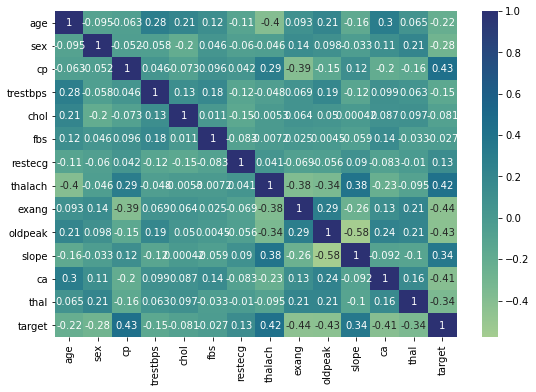

In [38]:
# Correlation using Heatmap
plt.figure(figsize = (9,6))
sns.heatmap(df.corr(), annot =True, cmap ='crest')

plt.show()

#### .Study how the other factors determines the occurrence of CVD.
#### . Hence,  the occurence of CVD states that the Cardio Vascular Disease is True

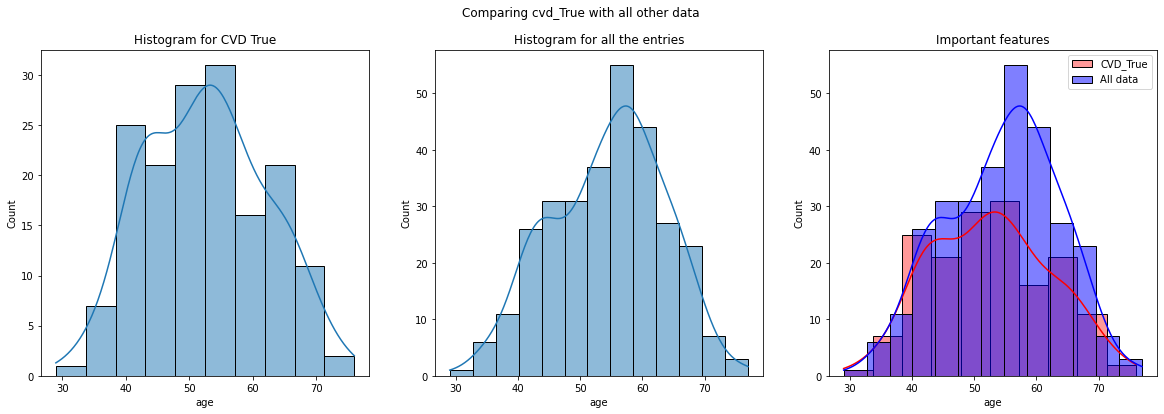

In [39]:
cvd_True = df.loc[df.target == 1]

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.histplot(x = cvd_True.age, kde=True)
plt.title('Histogram for CVD True')
plt.subplot(1,3,2)
sns.histplot(x=df.age,kde=True)
plt.title('Histogram for all the entries')
plt.subplot(1,3,3)
sns.histplot(x=cvd_True.age, kde=True, label='CVD_True', color='red', alpha=0.4)
sns.histplot(x=df.age, kde=True, label='All data', color='blue', alpha=0.5)
plt.title('Important features')
plt.legend()
plt.suptitle('Comparing cvd_True with all other data')
plt.show()


#### To  detect heart attacks based on Anomalies in the resting blood pressure (trestbps).

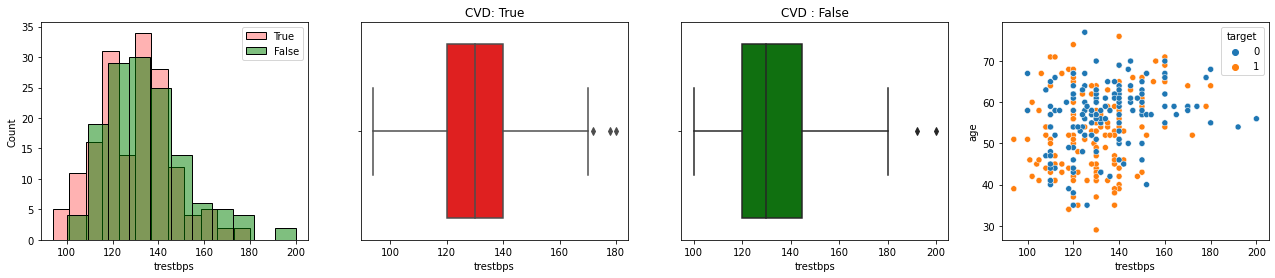

In [16]:
# Creating a new dataframe with CVD: False

cvd_False = df.loc[df.target == 0]

plt.figure(figsize=(22,4))


# Subplot - 1
plt.subplot(1,4,1)
sns.histplot(cvd_True.trestbps, color='red', alpha=0.3, label='True')
sns.histplot(cvd_False.trestbps, color='green', alpha=0.5,label='False')
plt.legend()

# Subplot - 2
plt.subplot(1,4,2)
sns.boxplot(cvd_True.trestbps, color='red')
plt.title("CVD: True")

# Subplot -3
plt.subplot(1,4,3)
sns.boxplot(cvd_False.trestbps, color='green')
plt.title("CVD : False")

# Using Scatterplot
plt.subplot(1,4,4)
sns.scatterplot(y=df.age, x=df.trestbps, hue=df.target)
plt.show()


#### Observation: people who develop Cardio Vascular Disease have lower resting bp than people who don't have. Majority develops in the age around 42 to 68

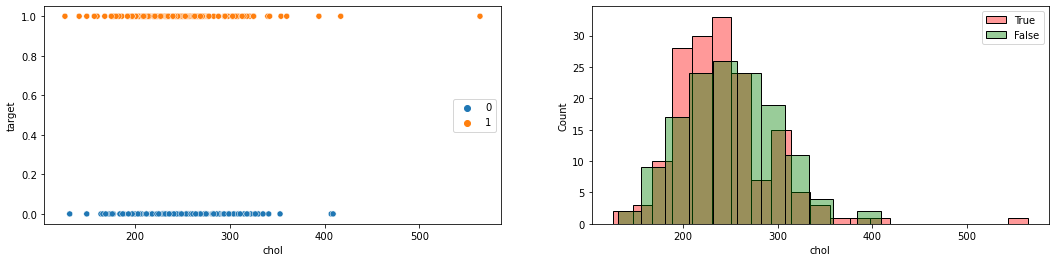

In [17]:
# Describe the cholesterol Level & Target

plt.figure(figsize=(18,4))
plt.subplot(121)
sns.scatterplot(x=df.chol, y=df.target, hue=df.target)
plt.legend(loc='center right')

plt.subplot(122)
sns.histplot(cvd_True.chol, color='red',alpha=0.4,label='True')
sns.histplot(cvd_False.chol, color='green',alpha=0.4,label='False')
plt.legend()

#### Introducing LabelEncoder for Categorical Variables

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [41]:
cols = ['sex','cp','restecg', 'exang','slope']

for i in cols:
    df[i] = encoder.fit_transform(df[i])

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
# Dropping Target
X = df.drop('target',axis = 1)
y = df['target']

In [45]:
# Splitting data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y, random_state = 42, test_size =0.3)


#### Model Building : Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier


forest_model = RandomForestClassifier(max_depth = 70, min_samples_leaf = 5, n_estimators = 1000, min_samples_split = 12).fit(X_train, y_train)

In [47]:
from sklearn.metrics import accuracy_score
y_predict = forest_model.predict(X_test)

accuracy_score(y_test, y_predict)

0.8571428571428571

#### XGBoost

In [48]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 80, subsample = 0.7, learning_rate = 0.01).fit(X_train, y_train)

In [49]:
y_predict = xgb_model.predict(X_test)

In [50]:
accuracy_score(y_test, y_predict)

0.8351648351648352